In [ ]:
# mount drive, where the model outputs and audience feedback results are
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load the data from files into data frames
import pandas as pd

# loading the X data from 3 models
directory_path ='/content/drive/MyDrive/alpha/working model/final working models/model_outputs'
x_m1 = pd.read_csv(directory_path + '/final_method1.csv')
x_m2 = pd.read_csv(directory_path + '/final_method2.csv')
x_m3 = pd.read_csv(directory_path + '/final_method3.csv')

# creating the X combinations (m1+m2, m1+m3, m2+m3, m1+m2+m3)
x_m1m2 = x_m1.join(x_m2)
x_m1m3 = x_m1.join(x_m3)
x_m2m3 = x_m2.join(x_m3)
x_m1m2m3 = x_m1.join(x_m2m3)

# loading the Y data ()
y = pd.read_csv(directory_path + '/survey_answer_average.csv')

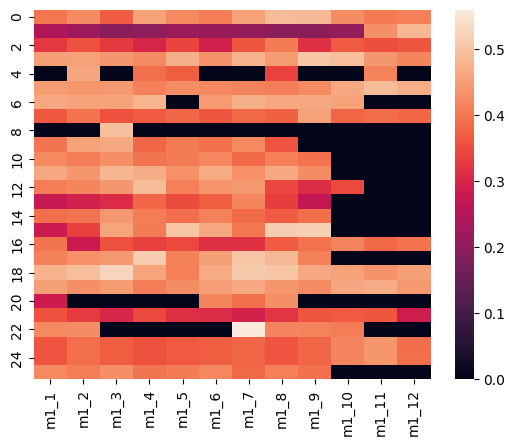

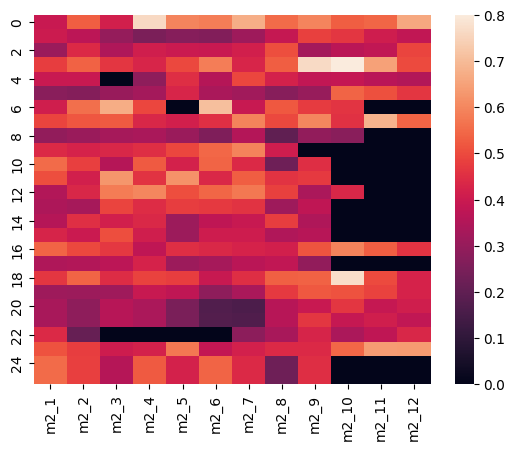

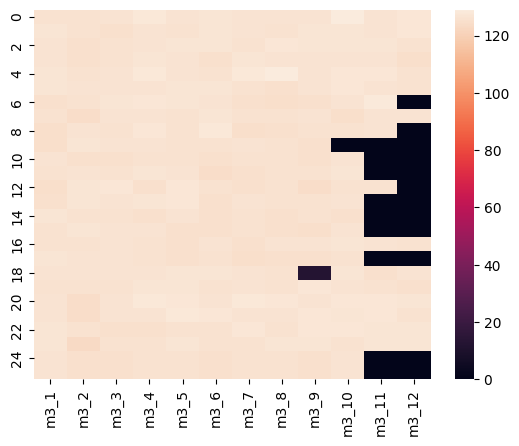

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create and display the heatmap
sns.heatmap(x_m1, annot=False)
plt.show()
sns.heatmap(x_m2, annot=False)
plt.show()
sns.heatmap(x_m3, annot=False)
plt.show()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
# This function returns a quality score for Linear Regression
# It uses leave-one-out approach
# and use Linear Regression to predict Y from X
# Y represents 3 scores, one per survey question
def LooCrossValidationRegression(X, y):
  sum_errors_test = [0, 0, 0]
  sum_errors_train = 0
  # Initialize a list to store cumulative errors
  model = LinearRegression()
  for i in range(len(X)):
    #remove one data point (i) from X and Y
    Xsubset = np.delete(X, i, axis=0)
    Ysubset = np.delete(y, i, axis=0)
    # calculate the regression
    model.fit(Xsubset, Ysubset)
    trainError = (Ysubset - model.predict(Xsubset))
    trainSE = trainError ** 2
    trainMSE = np.zeros(3)
    for j in range(trainSE.shape[1]):
      trainMSE[j] = np.mean(trainSE[:, j])
    sum_errors_train += trainMSE
    # evaluate the fitted model on the data-point i that was left out
    new_data = X[i, :]
    predicted_value = model.predict(new_data.reshape(1, -1))
    #trim the predicted values
    for j in range(3):
      if(predicted_value[0][j] < 0):
        predicted_value[0][j] = 0
      if(predicted_value[0][j] > 5):
        predicted_value[0][j] = 5
    # aggregate the squared error for each of the 3 answers
    sum_errors_test[0] += (predicted_value[0][0] - y[i, :][0]) ** 2
    sum_errors_test[1] += (predicted_value[0][1] - y[i, :][1]) ** 2
    sum_errors_test[2] += (predicted_value[0][2] - y[i, :][2]) ** 2
  return sum_errors_test[0] / len(X), sum_errors_test[1] / len(X), sum_errors_test[2] / len(X),sum_errors_train # Return the calculated errors

In [ ]:
print(LooCrossValidationRegression(x_m1.to_numpy(), y.to_numpy()))
print(LooCrossValidationRegression(x_m2.to_numpy(), y.to_numpy()))
print(LooCrossValidationRegression(x_m3.to_numpy(), y.to_numpy()))
print(LooCrossValidationRegression(x_m1m2.to_numpy(), y.to_numpy()))
print(LooCrossValidationRegression(x_m1m3.to_numpy(), y.to_numpy()))
print(LooCrossValidationRegression(x_m2m3.to_numpy(), y.to_numpy()))
print(LooCrossValidationRegression(x_m1m2m3.to_numpy(), y.to_numpy()))

(0.5776692139892974, 2.7699022821433052, 1.3194900840294608, array([4.67612226, 3.76105572, 3.55945505]))
(0.5398578725529699, 0.5066164790033029, 0.7887751160890386, array([3.97015386, 3.43090301, 4.29429521]))
(0.7905357878623788, 0.6148119193639272, 0.5229902708718057, array([2.94119372, 2.37518738, 3.26114837]))
(6.853210618787689, 6.395507072434172, 4.928842668174288, array([1.95045859e-27, 1.76245726e-27, 5.40809116e-27]))
(3.7453148027107357, 7.526097491140728, 6.630451639570731, array([1.47754115e-24, 1.87798928e-24, 4.89436367e-24]))
(0.9165944390838617, 2.200873108192407, 3.2016945936903123, array([0.04083333, 0.04083333, 0.04083333]))
(1.3363129357672177, 1.086255259721676, 2.364191157895984, array([1.09601431e-25, 3.17201601e-26, 4.15656175e-26]))


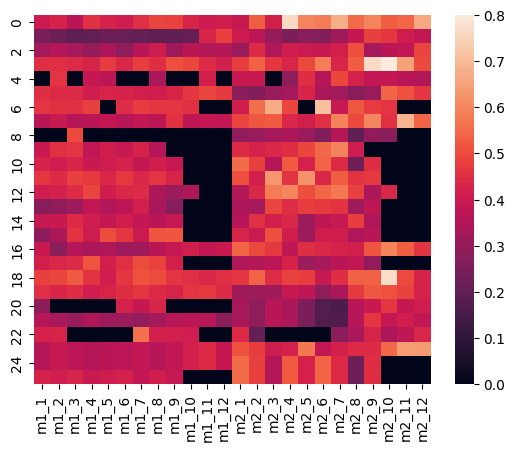

predicted value: [[0. 0. 5.]]
real value: [4.   3.5  3.25]
predicted value: [[1.038058 0.       5.      ]]
real value: [4.   3.5  3.25]
predicted value: [[5.         2.29143612 4.93991844]]
real value: [4.   3.5  3.25]
predicted value: [[2.59627577 1.38513418 5.        ]]
real value: [4.   3.5  3.25]
predicted value: [[5. 5. 0.]]
real value: [4.   3.5  3.25]
predicted value: [[0. 0. 5.]]
real value: [4.   3.5  3.25]
predicted value: [[5. 5. 0.]]
real value: [4.   3.5  3.25]
predicted value: [[0. 0. 5.]]
real value: [4.   3.5  3.25]
predicted value: [[0. 0. 5.]]
real value: [4.   3.5  3.25]
predicted value: [[0.01052956 5.         2.65601374]]
real value: [4.   3.5  3.25]
predicted value: [[3.75 4.25 3.75]]
real value: [4.   3.5  3.25]
predicted value: [[1.19528951 0.64536851 5.        ]]
real value: [4.   3.5  3.25]
predicted value: [[0.6864631  0.28931253 5.        ]]
real value: [4.   3.5  3.25]
predicted value: [[4.97705372 4.65853855 2.76914161]]
real value: [4.   3.5  3.25]
predic

In [ ]:
sns.heatmap(x_m1m2, annot=False)
plt.show()
print(LooCrossValidationRegression(x_m1m2.to_numpy(), y.to_numpy()))

1.0


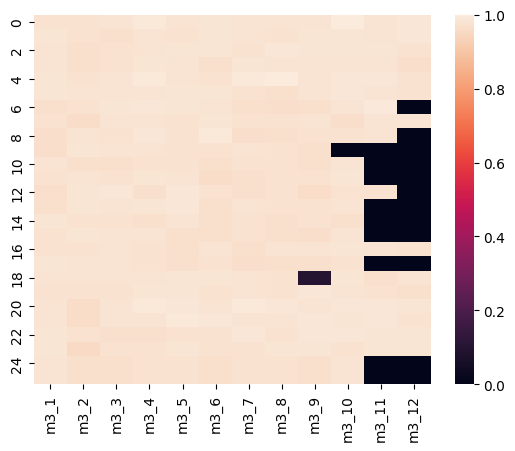

(0.3660665274484467, 2.0219292845935573, 1.1013398568938966)
(0.3319635576802827, 0.5560608716405221, 0.4686613718461378)
(0.7008183648356338, 0.5906408761543139, 0.559228139543919)
(6.783008246728121, 5.444468534080128, 4.050271202821554)
(3.4461756930320298, 5.509750082949733, 5.447229168261641)
(2.466313838754647, 2.182723690856645, 3.333585976225955)
(2.9835718948272647, 0.775107589655444, 0.7956952227760884)


In [ ]:
matrix = np.array(x_m3)
max_value = matrix.max()
print(max_value)
x_m3 = x_m3 / max_value
x_m3.head()
sns.heatmap(x_m3, annot=False)
plt.show()

x_m1m2 = x_m1.join(x_m2)
x_m1m3 = x_m1.join(x_m3)
x_m2m3 = x_m2.join(x_m3)
x_m1m2m3 = x_m1.join(x_m2m3)


print(LooCrossValidationRegression(x_m1.to_numpy(), y.to_numpy()))
print(LooCrossValidationRegression(x_m2.to_numpy(), y.to_numpy()))
print(LooCrossValidationRegression(x_m3.to_numpy(), y.to_numpy()))
print(LooCrossValidationRegression(x_m1m2.to_numpy(), y.to_numpy()))
print(LooCrossValidationRegression(x_m1m3.to_numpy(), y.to_numpy()))
print(LooCrossValidationRegression(x_m2m3.to_numpy(), y.to_numpy()))
print(LooCrossValidationRegression(x_m1m2m3.to_numpy(), y.to_numpy()))